In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import sys
sys.path.append('/content/drive/MyDrive/learning rate tuning')

Mounted at /content/drive/


In [ ]:
# Imports
import os
import torch
import torch.optim as optim
import torch.nn as nn
import shutil
import numpy as np
import torchvision
import albumentations as A

from data_augmentation import augmentation
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from transformers import ViTForImageClassification
from tqdm import tqdm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

## Data Preperation

In [ ]:
# Apply augmentation here
# remember to change input_folder and output_folder!!!
char_list = ['dori', 'lisa', 'amber', 'childe', 'venti', 'zhongli', 'eula', 'ganyu', 'hutao', 'yoimiya', 'raiden', 'nahida']
augmentation.process_folder(char_list, num_aug=3)

Processed 2d7e8fd5c08794cdb6efffb9d3e864f1_573116708228114109.jpg
Processed 1k1tus74c44c1.jpg_person_0.jpg
Processed 1.jpg_person_0.jpg
Processed 4f743c664e576f0453a417a79fb223db_2156934232139002302.jpg_person_0.jpg
Processed 89c158a4ba8bc1638a057724a23c405a.jpg_person_0.jpg
Processed 5_f4b100cf-c9be-4efe-81e3-de6c9f1939b9.jpg_person_0.jpg
Processed 4d273b13111fd010b9d2ebc66d797027.jpg_person_0.jpg
Processed 4l3uc8z96rz91.jpg_person_0.jpg
Processed 123.jpg_person_0.jpg
Processed 640x640q90.jpg
Processed 57002ey.jpg
Processed 1234.jpg
Processed 1528299.jpg_person_0.jpg
Processed 67087ef0efa502d7edb27ca561413c93.jpg_person_0.jpg
Processed 470570.jpg
Processed 20240521_664c62af13e2b.jpg_person_0.jpg
Processed 20240521_664c62b0a10df.jpg_person_0.jpg
Processed b05db2010dd6aa3bd72385a3bc176f54_1148165468859077393.jpg_person_0.jpg
Processed 815818012ab7c5b5832be3ea2cbf994a_6081765440921617244.jpg_person_0.jpg
Processed dori-cosplay-by-fraurinr8z82iq20a1.jpg
Processed CGI209DR_width_600_height

In [ ]:
# copy original dataset to augmented folders
extracted_dir = '/content/drive/MyDrive/learning rate tuning/extracted'
augmented_dir = '/content/drive/MyDrive/learning rate tuning/augmented'

for subfolder in os.listdir(extracted_dir):
    extracted_subfolder_path = os.path.join(extracted_dir, subfolder)

    if os.path.isdir(extracted_subfolder_path) and subfolder.endswith("_extracted"):
        augmented_subfolder = subfolder.replace("_extracted", "_augmented")
        augmented_subfolder_path = os.path.join(augmented_dir, augmented_subfolder)

        if os.path.isdir(augmented_subfolder_path):
            for file_name in os.listdir(extracted_subfolder_path):
                extracted_file_path = os.path.join(extracted_subfolder_path, file_name)

                if os.path.isfile(extracted_file_path):
                    shutil.copy(extracted_file_path, augmented_subfolder_path)
                    print(f'Copied {file_name} to {augmented_subfolder_path}')
        else:
            print(f'Augmented subfolder {augmented_subfolder_path} does not exist. Skipping.')

Copied google_0000 (2).jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0000.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0009.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0012.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0002.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0000.png_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0003.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0005.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augmented
Copied google_0001.jpg_person_0.jpg to /content/drive/MyDrive/learning rate tuning/augmented/zhongli_augment

In [ ]:
# Target is on all the root directory for all the _extracted folders
dataset_dir = '/content/drive/MyDrive/learning rate tuning/augmented' # Whatever folder the augmented dataset is in
train_dir = '/content/drive/MyDrive/learning rate tuning/processed_splits/train'  # Destination for training set
test_dir = '/content/drive/MyDrive/learning rate tuning/processed_splits/test'    # Destination for test set
val_dir = '/content/drive/MyDrive/learning rate tuning/processed_splits/val'    # Destination for validation set

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

In [ ]:
def train_test_val_split(dataset_dir, test_size, val_size):
    for character_folder in os.listdir(dataset_dir):
        character_path = os.path.join(dataset_dir, character_folder)

        if os.path.isdir(character_path):
            # Get all image filenames for the current character
            images = os.listdir(character_path)

            # Split into train+val and test sets
            train_val_images, test_images = train_test_split(images, test_size=test_size, random_state=5242)

            # Split train_val into train and val sets
            train_images, val_images = train_test_split(train_val_images, test_size=val_size, random_state=5242)

            # Create train, val, and test subfolders for the character
            train_character_dir = os.path.join(train_dir, character_folder)
            val_character_dir = os.path.join(val_dir, character_folder)
            test_character_dir = os.path.join(test_dir, character_folder)
            os.makedirs(train_character_dir, exist_ok=True)
            os.makedirs(val_character_dir, exist_ok=True)
            os.makedirs(test_character_dir, exist_ok=True)

            # Move training images
            for image in train_images:
                src_image_path = os.path.join(character_path, image)
                dst_image_path = os.path.join(train_character_dir, image)
                shutil.copy(src_image_path, dst_image_path)

            # Move validation images
            for image in val_images:
                src_image_path = os.path.join(character_path, image)
                dst_image_path = os.path.join(val_character_dir, image)
                shutil.copy(src_image_path, dst_image_path)

            # Move testing images
            for image in test_images:
                src_image_path = os.path.join(character_path, image)
                dst_image_path = os.path.join(test_character_dir, image)
                shutil.copy(src_image_path, dst_image_path)

            print(f'Successfully split {character_folder} into train/test/val sets.')

In [ ]:
# Define split ratios
test_size = 0.15
val_size = 0.15

In [ ]:
train_test_val_split(dataset_dir, test_size, val_size)

Successfully split dori_augmented into train/test/val sets.
Successfully split lisa_augmented into train/test/val sets.
Successfully split amber_augmented into train/test/val sets.
Successfully split childe_augmented into train/test/val sets.
Successfully split venti_augmented into train/test/val sets.
Successfully split zhongli_augmented into train/test/val sets.
Successfully split eula_augmented into train/test/val sets.
Successfully split ganyu_augmented into train/test/val sets.
Successfully split hutao_augmented into train/test/val sets.
Successfully split yoimiya_augmented into train/test/val sets.
Successfully split raiden_augmented into train/test/val sets.
Successfully split nahida_augmented into train/test/val sets.


In [ ]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(val_dir, transform=transform)

# Pass these datasets to DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training

In [ ]:
!pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.78E-03


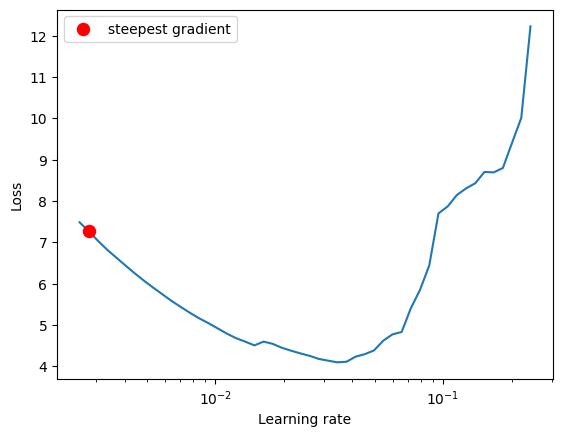

In [ ]:
from torch_lr_finder import LRFinder
# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False, maximize=False, foreach=None, capturable=False, differentiable=False, fused=None)

def modified_criterion(outputs, labels):
    # Extract logits for compatibility with CrossEntropyLoss
    logits = outputs.logits if hasattr(outputs, "logits") else outputs
    return criterion(logits, labels)

def find_optimal_lr(model, train_loader, modified_criterion, optimizer, device):
    lr_finder = LRFinder(model, optimizer, modified_criterion, device=device)
    lr_finder.range_test(train_loader, end_lr=10, num_iter=100)
    lr_finder.plot()  # Plot the learning rate range test
    lr_finder.reset()  # Reset model and optimizer to their initial states

# Set up device, model, and call the LR Finder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
find_optimal_lr(model, train_loader, modified_criterion, optimizer, device)